In [ ]:
import utility

utility.lj_potential(0.5,10)

In [ ]:
utility.pbc(43,10)

In [ ]:
import init
#parameters
rho = 0.01
Npart = 108
box_length = (Npart / rho) ** (1/3)
# print(box_length)
bond_length = 2.353  #angstrom

k = 30
temp = 300 #kelvin
beta = 1

debug = True
accepted_steps = 0

In [ ]:
positions = init.init_system(box_length, Npart)


In [ ]:
positions
import random
import numpy as np


In [ ]:
idx = random.randint(0,Npart-1)
idx

In [ ]:
prev_position = np.copy(positions[idx])
prev_position

In [ ]:
Wo1 = k * np.exp(-beta * utility.energy_of_particle(idx,0,positions,box_length))
Wo1

In [ ]:
Wo2 = np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length))
for i in range(k-1):
    r = utility.generate_random_unit_vector() * bond_length
    positions[idx][1] = positions[idx][0] + r
    Wo2 += np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length))
    
Wo = Wo1 * Wo2
print(Wo)

In [ ]:
positions[idx][0] = np.random.rand(3)* box_length
positions[idx][0]

In [ ]:
Wn1 =  k * np.exp(-beta * utility.energy_of_particle(idx,0,positions,box_length))
Wn1

In [ ]:
#select a random_chain
    global accepted_steps
    idx = random.randint(0,Npart-1)
    #find rosenbluth factor for previous configuration
    prev_position = np.copy(positions[idx])
    Wo1 = k * np.exp(-beta * utility.energy_of_particle(idx,0,positions,box_length))
    Wo2 = np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length))
    for i in range(k-1):
        r = utility.generate_random_unit_vector() * bond_length
        positions[idx][1] = positions[idx][0] + r
        Wo2 += np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length))
    
    Wo = Wo1 * Wo2
    #find rosenbluth factor for new configuration
    #choose a random postion for first atom
    positions[idx][0] = np.random.rand(3)* box_length
    Wn1 =  k * np.exp(-beta * utility.energy_of_particle(idx,0,positions,box_length))
    second_atom_pos = []
    Wn2 = []
    for i in range(k):
        r = utility.generate_random_unit_vector()* bond_length
        positions[idx][1] = positions[idx][0] + r
        second_atom_pos.append(positions[idx][1])
        Wn2.append(np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length)))

    Wn2_sum = sum(Wn2)

    #select a configuration i with probaility Wn2[i]/Wn2_sum
    cum_Wn2 = Wn2[0]
    r_Wn2_sum = random.random()*Wn2_sum
    i = 0
    while cum_Wn2 < r_Wn2_sum:
        i +=1
        cum_Wn2 += Wn2[i]
    print(i, Wn2[i])
    Wn = Wn1 * Wn2_sum
    #replace position of second atom with selected second atom configuration 
    positions[idx][1] = second_atom_pos[i]
    print(Wo, " ", Wn)
    if Wn < Wo and random.random() > Wn/Wo:
        #not accept
        positions[idx] = prev_position   
    else :
        accepted_steps += 1
        if debug:
            print("new move accepted")
    
    return 


In [ ]:
import init
import utility
import visualize
import random
import numpy as np

#parameters
rho = 0.01
Npart = 108
box_length = (Npart / rho) ** (1/3)
# print(box_length)
bond_length = 2.353  #angstrom

k = 30
temp = 300 #kelvin
beta = 1

debug = True
accepted_steps = 0

positions = init.init_system(box_length, Npart)

def check(positions):
    for pos in positions:
        if np.linalg.norm(pos[0] - pos[1]) > bond_length + 0.01:
            return False
    
    return True

def get_minimum_distance(positions, idx1, idx2):
    min_len = 1000
    for i in range(len(positions)):
        if idx1 !=i:
            for pos in positions[i]:
                min_len = min(min_len, utility.pbc(np.linalg.norm(pos - positions[idx1][idx2]),box_length))
    
    return min_len

def CBMC_step(positions, Npart):
    #select a random_chain
    global accepted_steps
    idx = random.randint(0,Npart-1)
    #find rosenbluth factor for previous configuration
    prev_position = np.copy(positions[idx])
    Wo1 = k * np.exp(-beta * utility.energy_of_particle(idx,0,positions,box_length))
    Wo2 = np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length))
    for i in range(k-1):
        r = utility.generate_random_unit_vector() * bond_length
        positions[idx][1] = positions[idx][0] + r
        Wo2 += np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length))
    # print("Wo2" ,Wo2)
    Wo = Wo1 * Wo2
    #find rosenbluth factor for new configuration
    #choose a random postion for first atom
    positions[idx][0] = np.random.rand(3)* box_length
    Wn1 =  k * np.exp(-beta * utility.energy_of_particle(idx,0,positions,box_length))
    second_atom_pos = []
    Wn2 = []
    for i in range(k):
        r = utility.generate_random_unit_vector()* bond_length
        positions[idx][1] = positions[idx][0] + r
        second_atom_pos.append(positions[idx][1])
        Wn2.append(np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length)))
        # if get_minimum_distance(positions,idx,1) <1 and np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length)) >1:
            # print(Wn2[i],np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length)) )

    Wn2_sum = sum(Wn2)
    # print(Wn2_sum)
    #select a configuration i with probaility Wn2[i]/Wn2_sum
    cum_Wn2 = Wn2[0]
    r_Wn2_sum = random.random()*Wn2_sum
    i = 0
    while cum_Wn2 < r_Wn2_sum:
        i +=1
        cum_Wn2 += Wn2[i]
    # print(i, Wn2[i])
    Wn = Wn1 * Wn2_sum
    #replace position of second atom with selected second atom configuration 
    positions[idx][1] = second_atom_pos[i]
    # print(Wo, " ", Wn)
    if Wn < Wo and random.random() > Wn/Wo:
        #not accept
        positions[idx] = prev_position   
    else :
        accepted_steps += 1
        if debug:
            print("new move accepted")
            print(Wn2[i], Wn1,Wn2[i]/Wn2_sum, get_minimum_distance(positions,idx,0),get_minimum_distance(positions,idx,1))
            if get_minimum_distance(positions,idx,1) < 1:
                print(np.exp(-1*utility.energy_of_particle(idx,1,positions,box_length)))
                # print(Wn2)
                
                # return True
    
    return False

total_energy_sum = 0

for i in range(100):
    # visualize.visualize(positions)
    energy = utility.total_energy(positions,box_length)
    # print(energy)
    total_energy_sum += energy
    if CBMC_step(positions,Npart) == True:
        break


print(f"avg_energy {total_energy_sum / 100}")
print(f"Acceptance percentage {accepted_steps/1}")
visualize.visualize(positions)


In [ ]:
a = [5,3,2,1,4]
b = sum(a)
b
a[1]

In [ ]:

global accepted_steps
idx = random.randint(0,Npart-1)
#find rosenbluth factor for previous configuration
prev_position = np.copy(positions[idx])
Wo1 = k * np.exp(-beta * utility.energy_of_particle(idx,0,positions,box_length))
Wo2 = np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length))
for i in range(k-1):
    r = utility.generate_random_unit_vector() * bond_length
    positions[idx][1] = positions[idx][0] + r
    Wo2 += np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length))
# print("Wo2" ,Wo2)
Wo = Wo1 * Wo2
#find rosenbluth factor for new configuration
#choose a random postion for first atom
positions[idx][0] = np.random.rand(3)* box_length
Wn1 =  k * np.exp(-beta * utility.energy_of_particle(idx,0,positions,box_length))
second_atom_pos = []
Wn2 = []
for i in range(k):
    r = utility.generate_random_unit_vector()* bond_length
    positions[idx][1] = positions[idx][0] + r
    second_atom_pos.append(positions[idx][1])
    Wn2.append(np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length)))
    # if get_minimum_distance(positions,idx,1) <1 and np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length)) >1:
        # print(Wn2[i],np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length)) )

Wn2_sum = sum(Wn2)
# print(Wn2_sum)
#select a configuration i with probaility Wn2[i]/Wn2_sum
cum_Wn2 = Wn2[0]
r_Wn2_sum = random.random()*Wn2_sum
i = 0
while cum_Wn2 < r_Wn2_sum:
    i +=1
    cum_Wn2 += Wn2[i]
# print(i, Wn2[i])
Wn = Wn1 * Wn2_sum
#replace position of second atom with selected second atom configuration 
positions[idx][1] = second_atom_pos[i]
# print(Wo, " ", Wn)
if Wn < Wo and random.random() > Wn/Wo:
    #not accept
    positions[idx] = prev_position   
else :
    accepted_steps += 1
    if debug:
        print("new move accepted")
        print(Wn2[i], Wn1,Wn2[i]/Wn2_sum, get_minimum_distance(positions,idx,0),get_minimum_distance(positions,idx,1))
        if get_minimum_distance(positions,idx,1) < 1:
            print(np.exp(-1*utility.energy_of_particle(idx,1,positions,box_length)))
            # print(Wn2)
            
            # return True

In [ ]:
a= np.array((3,1))
c = []
for i in range(10):
    a +=1
    c.append(a)
print(c)

In [ ]:
import visualize

visualize.plot_energy_from_file("energy.txt")

In [ ]:
import matplotlib.pyplot as plt
with open("energy.txt",'r') as f:
    energy = [float(line.strip()) for line in f]
    steps = [ int(100 * i) for i in range(len(energy))]
    plt.plot(steps, energy)
    plt.ylabel("Energy (KbT)")
    plt.xlabel("Number of steps")
    plt.grid()
    plt.show()

In [ ]:
np_positions = np.load('positions.npy', allow_pickle=True)


In [ ]:
positions = []
for mol_pos in np_positions:
    positions.append([mol_pos[0],mol_pos[1]])

In [ ]:
utility.total_energy(positions,box_length)

In [2]:
import init
from config import *
import utility
positions = init.init_system(box_length,Npart)

In [ ]:
len(positions)

In [ ]:
import visualize, utility
visualize.visualize(positions)
utility.total_energy(positions,box_length)

In [1]:
from ethane_cbmc import *
# from tempfile import TemporaryFile
# position_file = TemporaryFile()

# positions = init.init_system(box_length, Npart)
# positions = utility.read_positions_from_file("positions.npy")

# energy_file = open("energy.txt",'a' )

for i in range(nsteps):
    # visualize.visualize(positions)
    energy = utility.total_energy(positions,box_length)
    print(f"Energy of the system at step {i} is: {energy}")
    # if i%write_interval == 0:
        # energy_file.write(str(energy)+"\n")
    positions = CBMC_step(positions,Npart)

# np.save('positions.npy', np.array(positions, dtype=object), allow_pickle=True)


NameError: name 'positions' is not defined

In [ ]:
positions_list = [init.init_system(box_length,Npart),init.init_system(box_length,Npart)]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

def animate(i):
    # fig = plt.figure()
    ax.cla()
    positions = positions_list[i]
    for pos in positions:
        ax.plot([pos[0][0],pos[1][0]],[pos[0][1],pos[1][1]],
        [pos[0][2],pos[1][2]], 'g')
        ax.scatter3D([pos[0][0]],[pos[0][1]], [pos[0][2]], color = 'red')
        ax.scatter3D([pos[1][0]],[pos[1][1]], [pos[1][2]], color = 'blue')
    

num_plots = (len(positions_list))
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')
ani = FuncAnimation(fig, animate, frames=num_plots, interval=200)

writer = PillowWriter(fps=1)
ani.save('plots.gif', writer=writer)


In [ ]:
import init
import visualize
import utility
import numpy as np
with open('nvt.gro','r') as f:
    lines = [line for line in f]
    positions = []
    for i in range(Npart):
        l1 = lines[2*i+2].split()
        l2 = lines[2*i+3].split()
        mol_pos_1 = np.array([l1[3],l1[4],l1[5]]).astype(float)
        mol_pos_2 = np.array([l2[3],l2[4],l2[5]]).astype(float)
        positions.append([mol_pos_1,mol_pos_2])

positions

In [ ]:
lines

In [ ]:
from config import *
visualize.visualize(positions)

In [ ]:
utility.total_energy(positions,2.2)

In [ ]:
import init
import visualize
import utility
import numpy as np
positions = utility.read_positions_from_gromacs_file('nvt.gro')

In [ ]:
positions

In [ ]:
dx, dy, dz = positions[0][0] - positions[0][1]

In [ ]:
dx

In [ ]:
positions[0][0]

In [ ]:
positions[0][1]

In [ ]:
from config import *
utility.total_energy(positions,box_length)

In [ ]:
import init
from utility import generate_random_unit_vector
import numpy as np
from config import *
import random
import utility


In [ ]:
positions = init.init_system(box_length,108)

In [ ]:
import visualize
visualize.visualize_propane(positions)

In [ ]:
len(positions)

In [ ]:
for mol_pos in positions:
    r1 = mol_pos[2] - mol_pos[1]
    r2 = mol_pos[0] - mol_pos[1]
    r1 = utility.convert_to_unit_vector(r1)
    r2 = utility.convert_to_unit_vector(r2)
    print(np.arccos(np.dot(r1,r2)))

In [ ]:
# r1,r2 = init.generate_random_molecule(1.5)
r1 = np.array([0,0,0])
r2 = np.array([1.5,0,0])

In [ ]:
np.pi

In [ ]:
mol_pos = [r1,r2]

In [ ]:
def add_bond(mol_pos, beta = 1):
    r = mol_pos[-2] - mol_pos[-1]
    r = r / np.linalg.norm(r)
    print(r)
    flag = False
    while flag == False:
        r_new = generate_random_unit_vector()
        theta = np.arccos(np.dot(r,r_new))
        
        energy = 0.5*k_prop*(theta- theta_mean)**2
        if theta > 1.5:
            print(theta)
            print("energy" ,energy)
        
        if random.random() < np.exp(-beta*energy):
            r_new  = r_new *  bond_length + mol_pos[-1]
            flag = True
            return r_new
    


In [ ]:
r3 = add_bond(mol_pos)

In [ ]:
mol_pos.append(r3)


In [ ]:
mol_pos

In [ ]:
positions = [mol_pos]
import visualize
visualize.visualize_propane(positions)

In [ ]:
from utility import *
def add_bond_optimal(mol_pos, beta = 1):
    z = mol_pos[-2] - mol_pos[-1]
    y = np.array([0,1,0]) 
    if z[1] != 0:
        y = np.array([1,-(z[0]+z[2])/z[1],1])

    x = np.cross(y,z)

    #convert to unit vectors
    z = convert_to_unit_vector(z)
    y = convert_to_unit_vector(y)
    x = convert_to_unit_vector(x)

    #adding bond in spherical coordintate system for ease 

    r = bond_length
    theta = theta_mean
    phi = random.random() * (6.28)
    print(theta_mean)
    #converting this back to cartesian coordintates

    return mol_pos[-1] + (r*np.sin(theta)*np.cos(phi))*x + (r*np.sin(theta)*np.sin(phi))*y + (r*np.cos(theta))*z



In [ ]:
r1 = np.array([0,0,0])
r2 = np.array([1,0,0])

mol_pos = [r1,r2]

In [ ]:
r3 = add_bond_optimal(mol_pos)


In [ ]:
print(np.arccos(np.dot(convert_to_unit_vector(r3-r2),convert_to_unit_vector(r1-r2))))

In [ ]:
r3

In [ ]:
np.dot(r3-r2,r1-r2)

In [ ]:
import utility
positions = utility.read_positions_from_file("../project_runs/run10/8700/positions.npy")

In [ ]:
positions

In [ ]:
import visualize
visualize.visualize_propane(positions)

In [ ]:
from config import *
utility.total_energy(positions,box_length)

In [ ]:
import numpy as np
energy = np.zeros(Npart)
for i in range(len(positions)):
    for j in range(i+1,len(positions)):
        e = utility.find_potential_between_alkanes(positions[i],positions[j],box_length)
        energy[i] += e
        energy[j] +=e



In [ ]:
utility.energy_of_particle(77,0,positions,box_length)

In [5]:
import init
import utility
import visualize
import numpy as np
import random

#parameters

from config import *

def MC_step(positions, Npart):
    
    idx = random.randint(0,Npart-1)
    Uo = utility.energy_of_a_chain(idx, positions, box_length)
    prev_position = np.copy(positions[idx])
    positions[idx] = init.generate_random_molecule(bond_length)
    Un = utility.energy_of_a_chain(idx,positions,bond_length)
    print(Un, Uo)
    if random.random() < np.exp(-beta *(Un-Uo)):
        print(f"New state accepted")
        print(f"{positions[idx] - prev_position}")
        return positions, Un-Uo
    else :
        positions[idx] = prev_position
        print(f"Old state accepted")
        return positions, 0

    




In [6]:
positions = init.init_system(box_length,Npart)
positions

[[array([15.07663709, 19.78545882, 18.79954341]),
  array([15.75577911, 20.78103851, 19.69262079])],
 [array([19.2311088 , 10.41833604, 21.05275919]),
  array([20.15026197, 11.31057737, 21.833184  ])],
 [array([20.46353547,  7.38499641,  6.50339564]),
  array([21.77729858,  7.94924722,  6.95687939])],
 [array([ 8.9575198 , 10.70735628,  9.61274781]),
  array([ 9.20081832, 11.50835042, 10.85742215])],
 [array([13.31174971, 19.90286608,  1.63378849]),
  array([13.83065399, 21.15013683,  2.28575016])],
 [array([ 5.71376767, 13.1532079 , 10.57893611]),
  array([ 6.04290018, 13.42199513, 12.0174858 ])],
 [array([19.18323003, 13.29569772,  3.89534005]),
  array([19.61922173, 13.97972306,  5.15709302])],
 [array([ 9.05215234,  5.97914121, 19.57720694]),
  array([ 9.33313146,  7.14396277, 20.47956024])],
 [array([20.18093949,  1.12231557,  8.51461977]),
  array([20.46222155,  2.0191735 ,  9.68360491])],
 [array([17.07192188,  1.4164454 , 10.20831132]),
  array([17.12193202,  1.4397742 , 11.707

In [7]:
energy  = utility.total_energy(positions,box_length)
energy

58810.80801203645

In [29]:
positions,_ = MC_step(positions, Npart)


440678670.2446585 32.690185030418846
Old state accepted


In [55]:
import numpy as np
energy = np.load('../ppt/butane_1/cbmc1_butane_energy.npy', allow_pickle=True)
energy = energy[1000:]
sum(energy)/(len(energy))


-662.2783981359356

Text(0, 0.5, 'Energy')

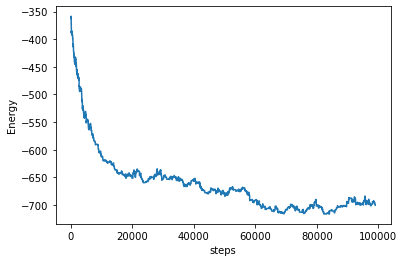

In [56]:
import matplotlib.pyplot as plt
steps = np.arange(energy.shape[0])

plt.plot(steps,energy)
plt.xlabel("steps")
plt.ylabel("Energy")

In [8]:
energy.shape[0]

100001

In [9]:
0.17 * 1.36 *10000

2312.0000000000005

In [7]:
26.34	*6.022e-4

0.015861948

In [4]:
import numpy as np
m1 = [np.array([1.361,1.357,1.295]),np.array([1.362,1.208,1.258]),np.array([1.232,1.130,1.231])]
m2 = [np.array([0.342,0.370,2.216]),np.array([0.224,0.786,2.144]),np.array([0.252,0.933,2.205])]

positions = [m1,m2]
from config import *
import utility
print(utility.total_energy(positions, box_length))
utility.calculate_pressure(positions)

-0.004030448997066699


0.12500822513336382

In [2]:
from config import *
import utility
import numpy as np
import init
# positions = init.init_system(box_length, Npart)
# positions = [[np.array([0,0,0])], [np.array([1.5*sigma,0,0])]]
# utility.total_energy(positions,box_length)

In [7]:
4*eps*((2/3)**12 - (2/3)**6)

-0.4420645001044328

In [11]:
energy = np.load('../ppt/ethane_280_1/mc_ethane_energy_19999.npy', allow_pickle=True)
energy = energy[5000:] 
print(np.std(energy))
sum(energy)/((len(energy)))

11.568120574751477


-88.86637350887445

Text(0, 0.5, 'Energy')

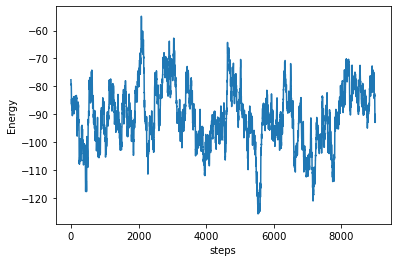

In [4]:
import matplotlib.pyplot as plt
steps = np.arange(energy.shape[0])
# e_d = [e/108 for e in energy]
plt.plot(steps,energy)
plt.xlabel("steps")
plt.ylabel("Energy")

In [22]:
108*1.98*148*1.38*6.02

262921.58323199995

In [42]:
269000/(1.38*6.02)

32379.989407289715

In [14]:
6.5*(0.373)**3/136

0.002480281327205882

In [15]:
136*6.5

884.0

In [32]:
2.03*108*148*1.38*6.022

269650.57230719994

In [33]:
2.99*148

442.52000000000004

In [35]:
0.35/(0.373)**3

6.744372500403072

In [37]:
(108/6.744)**(1/3)

2.520589162418689

In [43]:
1.38*1.23/(0.373**3)

32.70827966338336

In [44]:
3.2*148

473.6

In [47]:
1.23*1.38*0.1*3412

579.15288

In [60]:
a = np.zeros(3,)
np.ones(3,)

array([1., 1., 1.])

In [61]:
b = [a,np.ones(3,),a]

In [62]:
b = np.copy(b)

In [63]:
b

array([[0., 0., 0.],
       [1., 1., 1.],
       [0., 0., 0.]])

In [64]:
for atom_pos in b:
    print(atom_pos)

[0. 0. 0.]
[1. 1. 1.]
[0. 0. 0.]


2.82

2.597327480070407
3.0069945465558363
2.8918298817736376
2.7861057395091726


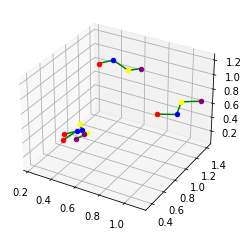

In [2]:
from config import *
import init
positions = init.init_system(box_length, Npart)
import visualize
visualize.visualize_butane(positions)

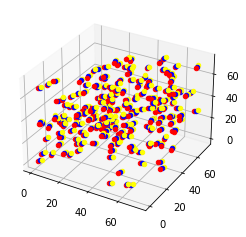

In [33]:
p = [36,  34 , 24 , 21]
v = [200, 400, 600, 800]

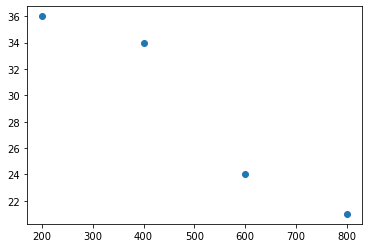

In [35]:
plt.scatter(v,p)

In [1]:
import init
from config import *
positions = init.init_system(box_length,Npart)

1.1520862557480611
[4.70014932 4.98372036 7.02586415] [4.71905435 5.24127581 7.0152371 ] [4.6288145  4.99181809 7.09521814]
2.9971246648307
[0.95911146 6.32695921 1.23491456] [0.96385492 6.28777059 1.24494401] [1.05851892 6.30587831 1.27092562]
2.882237189075943
[1.5503955  5.00860657 2.94593944] [1.59758103 4.97241931 2.90437018] [1.59407832 5.04565936 2.83663663]
0.7625375078061022
[6.44387742 6.68566994 4.6899019 ] [6.55236631 6.66948955 4.52816997] [6.552792   6.76884157 4.51851589]
1.1691871645940182
[1.33901597 2.8027483  5.53663765] [1.48447766 2.92703358 5.36000196] [1.42371804 3.00603763 5.36555488]
1.0373804602202419
[5.30095034 1.17404076 0.76829633] [5.50914535 1.08629648 0.85939168] [5.56094787 1.14320437 0.7958134 ]
2.9216519511350847
[2.45191551 1.17058708 0.95231897] [2.39562734 1.19556106 0.94812853] [2.3713138  1.15555431 1.03629041]
3.104755920961128
[5.59230925 4.44865226 4.7860565 ] [5.60140286 4.45225451 4.78246691] [5.57780968 4.54378646 4.81455228]
2.75559246966

IndexError: list index out of range

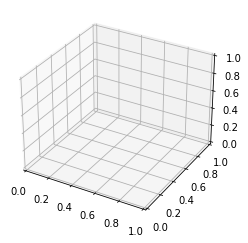

In [1]:
from config import *
import init
import visualize
Npart = 4
positions = init.init_system(box_length,Npart)
# visualize.visualize_butane(positions)

In [12]:
from config import *
import init
import copy
# Npart = 10
nsteps = 20
positions = init.init_system(box_length,Npart)
import butane_cbmc
positions_list = []
for i in range(nsteps):
    positions, accepted_states, energy_change, pressure_change = butane_cbmc.CBMC_step(positions, Npart)
    positions_list.append(copy.deepcopy(positions))


Old Rosenbluth factor 14027.789092469004 New Rosenbluth factor 19321.33653285376, Move accpeted !! 
Old Rosenbluth factor 15558.866808049774 New Rosenbluth factor 33643.20787388525, Move accpeted !! 
Old Rosenbluth factor 34637.82538027544 New Rosenbluth factor 26268.41329731245, Move accpeted !! 
Old Rosenbluth factor 11499.356150696516 New Rosenbluth factor 25192.963474942404, Move accpeted !! 
Old Rosenbluth factor 18959.773559094792 New Rosenbluth factor 31839.015969449556, Move accpeted !! 
Old Rosenbluth factor 20023.91731689986 New Rosenbluth factor 11256.0543571856, Move not accpeted !! 
Old Rosenbluth factor 19570.30579750975 New Rosenbluth factor 46619.82162091611, Move accpeted !! 
Old Rosenbluth factor 14972.198248060828 New Rosenbluth factor 39241.5067416435, Move accpeted !! 
Old Rosenbluth factor 32824.47768629317 New Rosenbluth factor 89980.85079640272, Move accpeted !! 
Old Rosenbluth factor 35975.96337539143 New Rosenbluth factor 99662.32205076012, Move accpeted !! 
O

In [13]:
print(positions_list[0])
print(positions_list[10])

[[array([1.3736303 , 0.73857955, 1.07108203]), array([1.39271837, 0.83579308, 1.18371051]), array([1.51645583, 0.79964849, 1.26040869]), array([1.54353033, 0.90480336, 1.36389503])], [array([1.57223442, 0.25486559, 0.60969966]), array([1.65634287, 0.34950561, 0.69012997]), array([1.78305207, 0.37934141, 0.61560074]), array([1.87381358, 0.4614472 , 0.70232437])], [array([0.70800916, 2.48310199, 2.46883456]), array([0.79217298, 2.58425955, 2.54083178]), array([0.82049665, 2.53571931, 2.67990591]), array([0.89708427, 2.64072743, 2.75479002])], [array([2.47235642, 2.73683701, 2.68318195]), array([2.50085152, 2.86215895, 2.76052819]), array([2.52972581, 2.82710097, 2.90348697]), array([2.51540827, 2.94964433, 2.98879896])], [array([0.51318117, 1.40376091, 2.01093337]), array([0.51425569, 1.51329412, 2.11340932]), array([0.65359436, 1.5310382 , 2.166039  ]), array([0.70453993, 1.39974356, 2.21767489])], [array([0.76075747, 2.49736534, 1.21622291]), array([0.8136288 , 2.63615904, 1.23722133])

[[[array([1.3736303 , 0.73857955, 1.07108203]), array([1.39271837, 0.83579308, 1.18371051]), array([1.51645583, 0.79964849, 1.26040869]), array([1.54353033, 0.90480336, 1.36389503])], [array([1.57223442, 0.25486559, 0.60969966]), array([1.65634287, 0.34950561, 0.69012997]), array([1.78305207, 0.37934141, 0.61560074]), array([1.87381358, 0.4614472 , 0.70232437])], [array([0.70800916, 2.48310199, 2.46883456]), array([0.79217298, 2.58425955, 2.54083178]), array([0.82049665, 2.53571931, 2.67990591]), array([0.89708427, 2.64072743, 2.75479002])], [array([2.47235642, 2.73683701, 2.68318195]), array([2.50085152, 2.86215895, 2.76052819]), array([2.52972581, 2.82710097, 2.90348697]), array([2.51540827, 2.94964433, 2.98879896])], [array([0.51318117, 1.40376091, 2.01093337]), array([0.51425569, 1.51329412, 2.11340932]), array([0.65359436, 1.5310382 , 2.166039  ]), array([0.70453993, 1.39974356, 2.21767489])], [array([0.76075747, 2.49736534, 1.21622291]), array([0.8136288 , 2.63615904, 1.23722133]

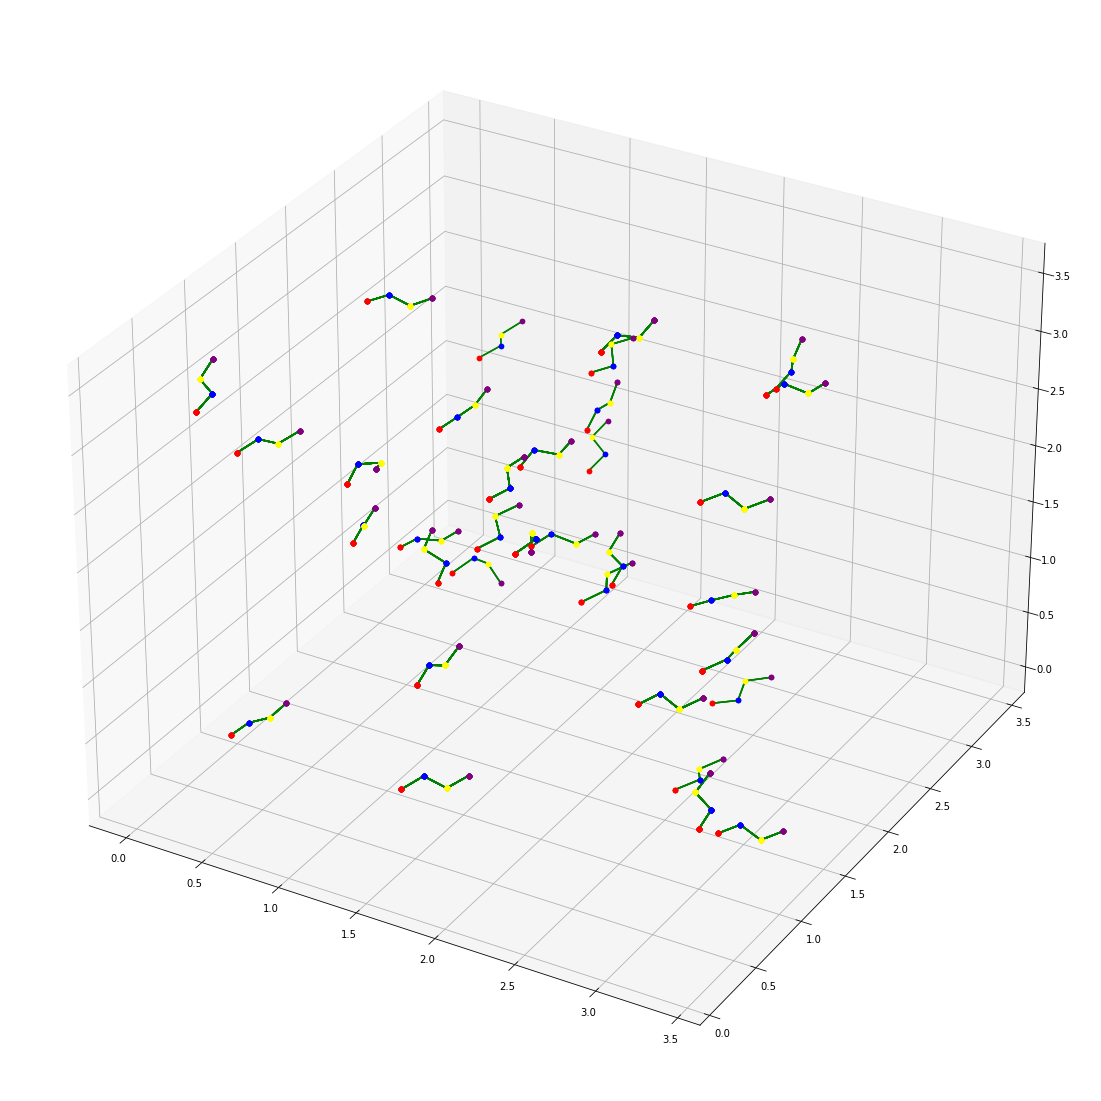

In [14]:
import visualize
visualize.convert_positions_from_file_to_video(positions_list)

20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
